In [1]:
#!pip install gcastle

In [1]:
import networkx as nx
import numpy as np
import pandas as pd

from castle.datasets import DAG, IIDSimulation

from IPython.display import SVG 
from sknetwork.visualization import svg_graph, svg_digraph 
from sknetwork.data import Bunch 
from sknetwork.ranking import PageRank 

In [2]:
def draw_graph(G, show_names=False, node_size=1, font_size=10, edge_width=0.5): 

    adjacency = nx.to_scipy_sparse_matrix(G, nodelist=None, dtype=None, weight='weight', format='csr') 

    names = np.array(list(G.nodes())) 

    graph = Bunch() 
    graph.adjacency = adjacency 
    graph.names = np.array(names) 

    pagerank = PageRank() 

    scores = pagerank.fit_transform(adjacency) 

    if show_names: 
        
        image = svg_digraph(graph.adjacency, font_size=font_size, node_size=node_size, names=graph.names, width=700, height=500, scores=scores, edge_width=edge_width) 

    else: 

        image = svg_digraph(graph.adjacency, node_size=node_size, width=700, height=500, scores = scores, edge_width=edge_width) 

    return SVG(image) 

# Types of Graphs: Part 1

Yesterday, we were able to use the Network Analysis network to create a learning curriculum. We will likely do that again, during this #100daysofnetworks adventures, to learn more and more to learn about. Basically, we can use that to identify gaps in our knowledge, and then we can learn those concepts. Today, we are going to learn about five different types of graphs, and look at some of their characteristics. 

We will look at:
- Cycle graphs
- Dense graphs
- Sparse graphs
- Regular graphs
- Wheel graphs

In practice, I tend to not think of these names when I am doing network analysis, as I am jumping between sections, excploring commmunities, looking at ego networks, identifying important nodes, etc. But this is useful to understand because THERE ARE different types of graphs, and they have unique characteristics. 

Often, in practice, I will see these types of graphs in subgraphs, or in cores, or in communities, but it is extremely rare that a network I analyze will be wheel graph, for instance. 

But this is useful knowledge, and it is good to have a common vocabulary.

I am using ChatGPT to make short work of summarization. As always, if you use a LLM, you should verify that it has given you the correct answer. You can see what I did here: https://chat.openai.com/share/04278943-07d5-4568-ad78-2f23c3e18c3e

We could build some of these with NetworkX graph generators, but I am doing this manually so that you can understand more easily.

I am using an older version of scikit-network. In newer versions, you can indicate whether a graph is directed or undirected, and it will render as such. In this version, I'd have to create two separate functions, so just note that in an undirected network, the arrows go both ways (and they do), and in a directed network, edges are often in a single direction, like a one-way street

## Cycle Graphs

A cycle graph is a type of graph in network science that forms a simple cycle, which is a closed path where each node is connected to exactly two neighbors except for the first and last nodes, which are connected to each other. Cycle graphs are fundamental structures in graph theory and are often used to model cyclic processes, circuits, and other scenarios with repeating patterns.

Example: A -> B -> C -> D -> A

You can learn more at https://en.wikipedia.org/wiki/Cycle_graph

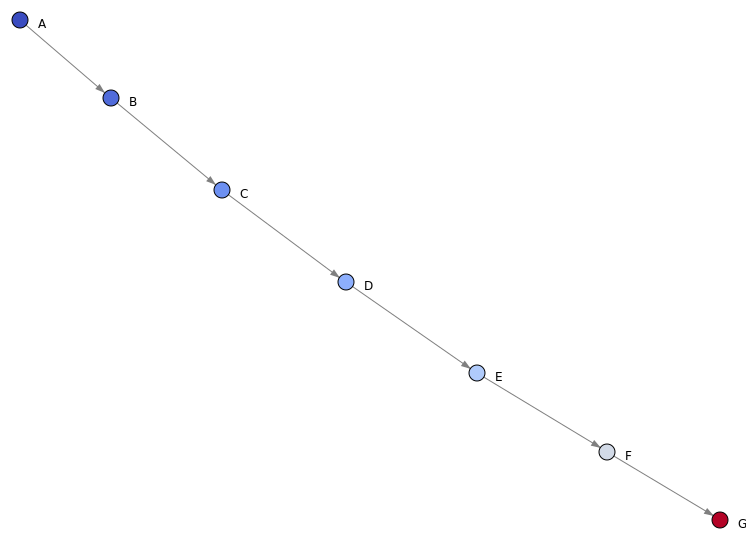

In [3]:
edges = ['AB', 'BC', 'CD', 'DE', 'EF', 'FG'] # drop 'GA'

edgelist = [(e[0],e[1]) for e in edges]

G = nx.from_edgelist(edgelist, create_using=nx.DiGraph)

draw_graph(G, show_names=True, node_size=8, font_size=12, edge_width=1)

In [4]:
adj_matrix = nx.adjacency_matrix(G)
#dataset = IIDSimulation(W=adj_matrix, n=100000, method='nonlinear', sem_type='mlp')

In [5]:
#dataset = IIDSimulation(W=adj_matrix, n=100000, method='nonlinear', sem_type='mim')

# mlp, mim, gp, gp-add, quadratic

In [6]:
%time dataset = IIDSimulation(W=adj_matrix, n=1000, method='nonlinear', sem_type='gp-add') # very, very slow

# mlp, mim, gp, gp-add, quadratic

2023-08-18 12:47:23,030 - C:\ProgramData\Anaconda3\lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


Wall time: 5.23 s


In [7]:
# dataset = IIDSimulation(W=adj_matrix, n=100000, method='nonlinear', sem_type='quadratic') # very, very slow

In [8]:
df = pd.DataFrame(dataset.X)
df.columns = ['A', 'B', 'C', 'D', 'E', 'F', 'G']
df.head()

,A,B,C,D,E,F,G
0,1.106939,-0.394898,-1.466112,-0.393813,0.883031,0.634512,0.205403
1,-0.685789,-1.879013,0.883324,2.284089,1.348344,-0.591684,-0.159532
2,1.033158,-0.652660,-0.416392,0.982045,2.953975,-0.284938,-0.001313
3,1.047577,0.924356,0.884187,0.488087,1.029145,-0.912085,-0.280990
4,-0.255742,-0.361589,-1.238950,-0.553254,0.055754,-0.818378,-0.074528


In [9]:
df.shape

(1000, 7)

In [10]:
df.corr()

,A,B,C,D,E,F,G
A,1.000000,0.231349,-0.025313,0.046174,0.017588,-0.023315,-0.039416
B,0.231349,1.000000,0.013457,-0.067081,-0.013813,-0.002331,-0.008133
C,-0.025313,0.013457,1.000000,-0.055142,-0.058084,0.028971,0.010630
D,0.046174,-0.067081,-0.055142,1.000000,0.045601,-0.014744,-0.049571
E,0.017588,-0.013813,-0.058084,0.045601,1.000000,0.072896,0.004441
F,-0.023315,-0.002331,0.028971,-0.014744,0.072896,1.000000,0.254317
G,-0.039416,-0.008133,0.010630,-0.049571,0.004441,0.254317,1.000000


In [11]:
from castle.algorithms import PC

pc = PC()

pc.learn(dataset.X)

2023-08-18 12:47:26,631 - C:\ProgramData\Anaconda3\lib\site-packages\castle\backend\__init__.py[line:37] - INFO: You can use `os.environ['CASTLE_BACKEND'] = backend` to set the backend(`pytorch` or `mindspore`).
2023-08-18 12:47:27,085 - C:\ProgramData\Anaconda3\lib\site-packages\castle\algorithms\__init__.py[line:36] - INFO: You are using ``pytorch`` as the backend.


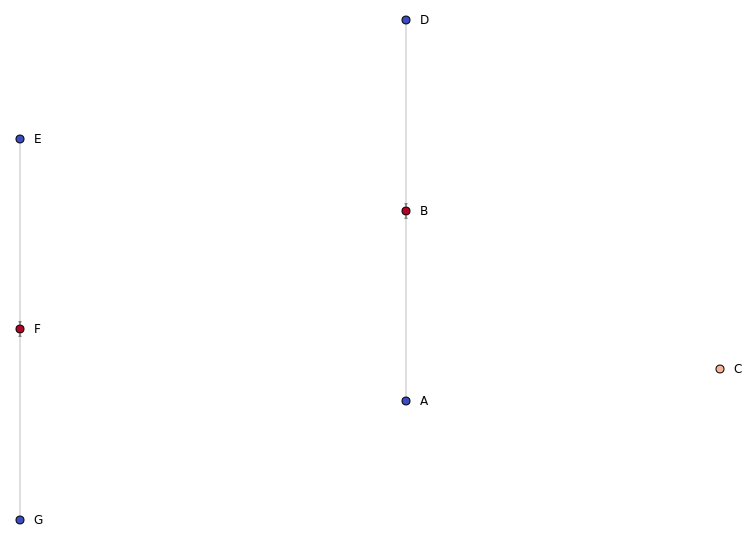

In [12]:
G = nx.from_numpy_matrix(pc.causal_matrix, create_using=nx.DiGraph)
mapping = {0:'A', 1:'B', 2:'C', 3:'D', 4:'E', 5:'F', 6:'G'}

G = nx.relabel_nodes(G, mapping)

draw_graph(G, show_names=True, node_size=4, font_size=12, edge_width=0.5)

## Dense Graphs

A dense graph is a type of graph in network science where most of the possible edges are present, resulting in a high density of connections between nodes. In a dense graph, the number of edges is close to the maximum possible for the given number of nodes. Dense graphs are often used to model scenarios where interactions or relationships between entities are widespread and frequent.

You can learn more at https://en.wikipedia.org/wiki/Dense_graph

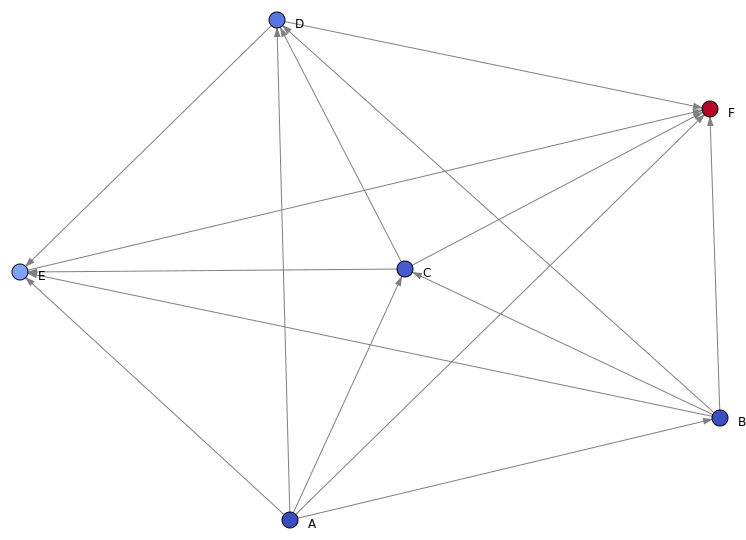

In [18]:
edges = ['AB', 'AC', 'AD', 'AE', 'AF', 'BC', 'BD', 'BE', 'BF', 'CD', 'CE', 'CF', 'DE', 'DF', 'EF']

edgelist = [(e[0],e[1]) for e in edges]

G = nx.from_edgelist(edgelist, create_using=nx.DiGraph)

draw_graph(G, show_names=True, node_size=8, font_size=12, edge_width=1)

In [19]:
adj_matrix = nx.adjacency_matrix(G)
dataset = IIDSimulation(W=adj_matrix, n=10, method='nonlinear', sem_type='mlp')

2023-08-15 17:57:08,325 - C:\ProgramData\Anaconda3\lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


In [20]:
df = pd.DataFrame(dataset.X)
df.columns = ['A', 'B', 'C', 'D', 'E', 'F']
df.head()

,A,B,C,D,E,F
0,0.859782,-1.746242,-6.261908,-15.842057,0.350116,-2.721349
1,0.015118,1.215961,-1.102614,-9.091076,2.982965,-6.954466
2,-0.549327,1.565483,2.183416,0.249567,3.399759,-5.300647
3,-0.503076,0.124221,-0.834232,-5.388574,1.643186,-4.497750
4,-0.878444,2.836033,-1.403281,-6.569934,3.758301,-7.757656


In [21]:
df.corr()

,A,B,C,D,E,F
A,1.000000,-0.949209,-0.883721,-0.612170,-0.809954,0.846218
B,-0.949209,1.000000,0.842925,0.500199,0.755076,-0.848499
C,-0.883721,0.842925,1.000000,0.846380,0.861012,-0.818228
D,-0.612170,0.500199,0.846380,1.000000,0.737067,-0.566074
E,-0.809954,0.755076,0.861012,0.737067,1.000000,-0.934947
F,0.846218,-0.848499,-0.818228,-0.566074,-0.934947,1.000000


## Wheel Graphs

A wheel graph is visibly identical to a cycle graph, but each of the outer nodes links to an inner node, creating what looks like a wheel. However, it is not identical to a cycle graph, as this is an undirected graph, where a cycle graph is directed.

You can learn more at https://en.wikipedia.org/wiki/Wheel_graph

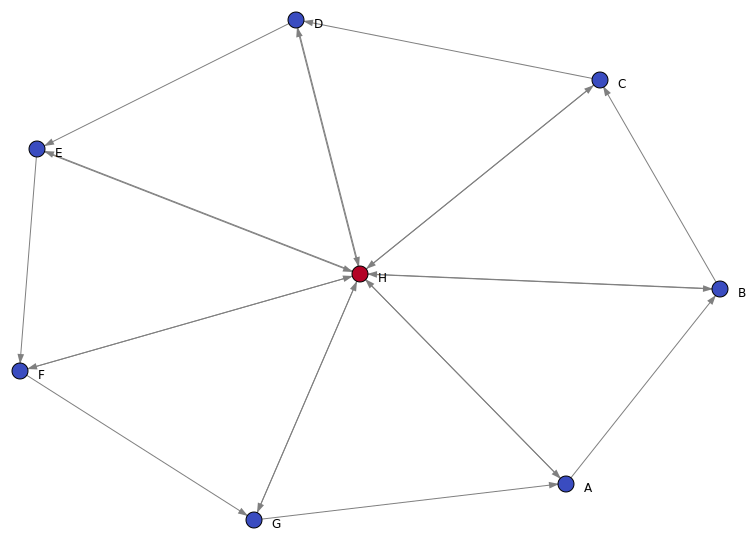

In [22]:
edges = ['AB', 'BC', 'CD', 'DE', 'EF', 'FG', 'GA', 'AH', 'BH', 'CH', 'DH', 'EH', 'FH', 'GH', 'HA', 'HB', 'HC', 'HD', 'HE', 'HF', 'HG']

edgelist = [(e[0],e[1]) for e in edges]

G = nx.from_edgelist(edgelist, create_using=nx.DiGraph)

draw_graph(G, show_names=True, node_size=8, font_size=12, edge_width=1)